# TITANIC CLASSIFICATION

Sindu Sayani

Dataset:https://storage.googleapis.com/kagglesdsdata/competitions/3136/26502

This dataset contains all the details of the passengers and based on this data we have to decide that passenger is survived or not

In [53]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [54]:
# Load the weather dataset

survive_data= pd.read_csv(r"C:\Users\sindu\Downloads\train.csv", header=0)

# Loading the Validation Dataset

survive_test_data=pd.read_csv(r"C:\Users\sindu\Downloads\test.csv",header=0)

# Copy to back-up file

survive_data_backup = survive_data.copy()
survive_test_data_backup=survive_test_data.copy()

# Display first 5 records of train dataset

survive_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning

In [55]:
survive_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [56]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
survive_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
survive_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [59]:
survive_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
# functions for better visualization of the posterior plots

def resizeplot():
    plt.figure(figsize=(12,6))
    
# function for correlations plots

def resizecorr():
    plt.figure(figsize=(15,7))

<AxesSubplot:>

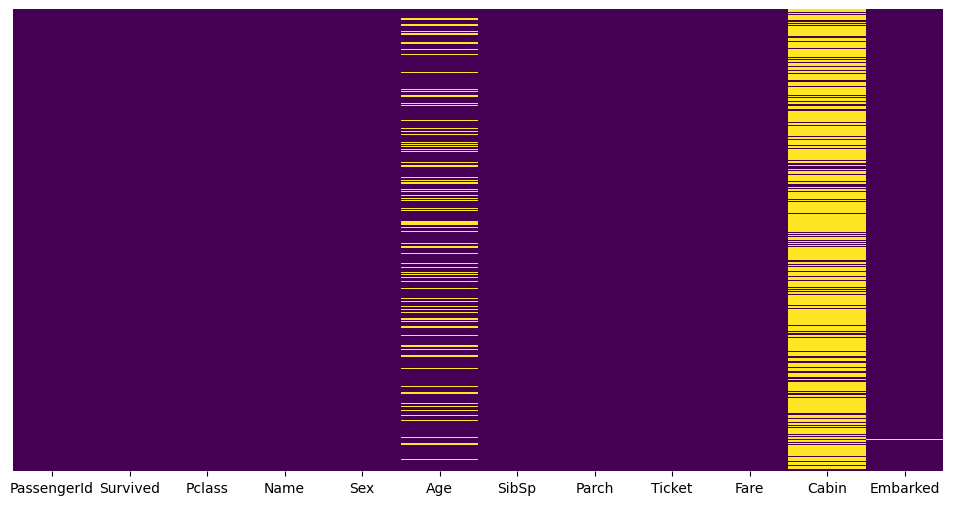

In [61]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(survive_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
#use Simpleimputer to address missing values


from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

survive_data['Age'] = imputer_str.fit_transform(survive_data[['Age']])
survive_data['Cabin'] = imputer_str.fit_transform(survive_data[['Cabin']])

survive_data['Embarked'] = imputer_str.fit_transform(survive_data[['Embarked']])


<AxesSubplot:>

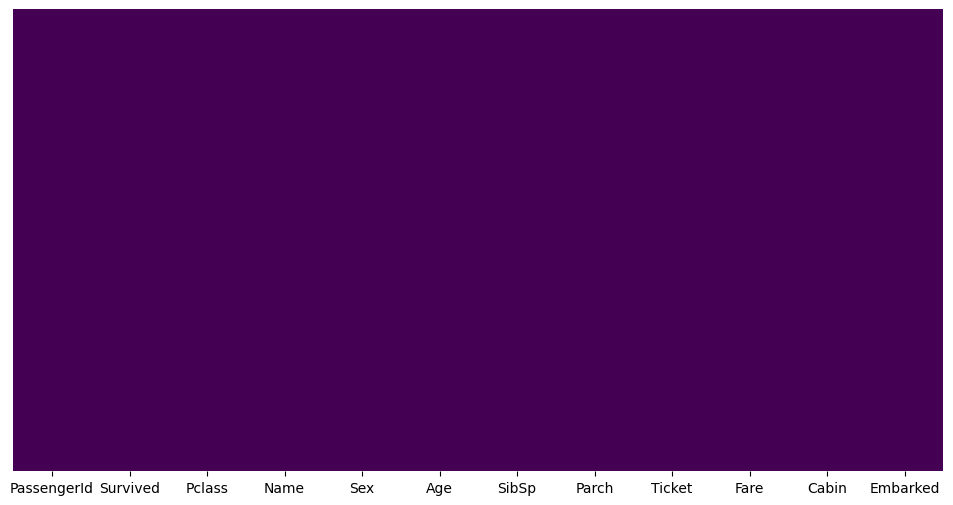

In [64]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(survive_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

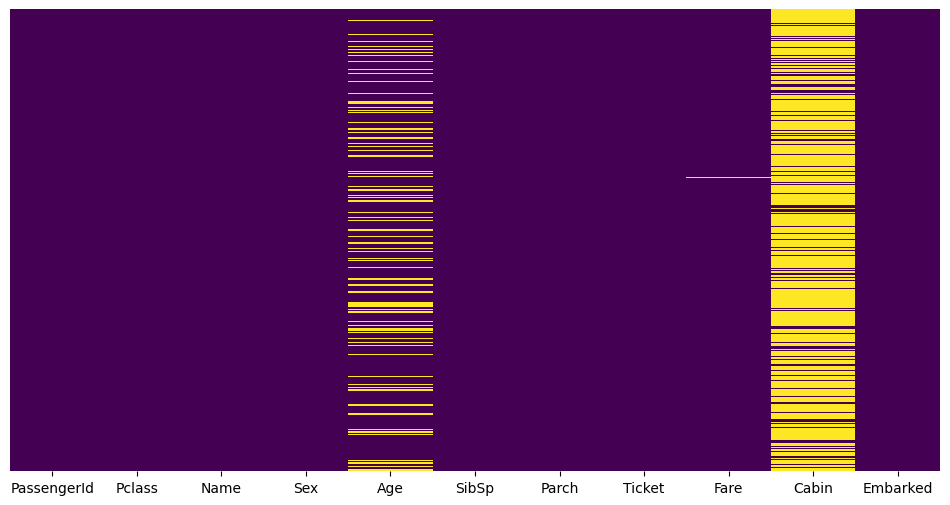

In [65]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(survive_test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
#use Simpleimputer to address missing values


from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

survive_test_data['Age'] = imputer_str.fit_transform(survive_test_data[['Age']])
survive_test_data['Cabin'] = imputer_str.fit_transform(survive_test_data[['Cabin']])
survive_test_data['Fare'] = imputer_str.fit_transform(survive_test_data[['Fare']])

<AxesSubplot:>

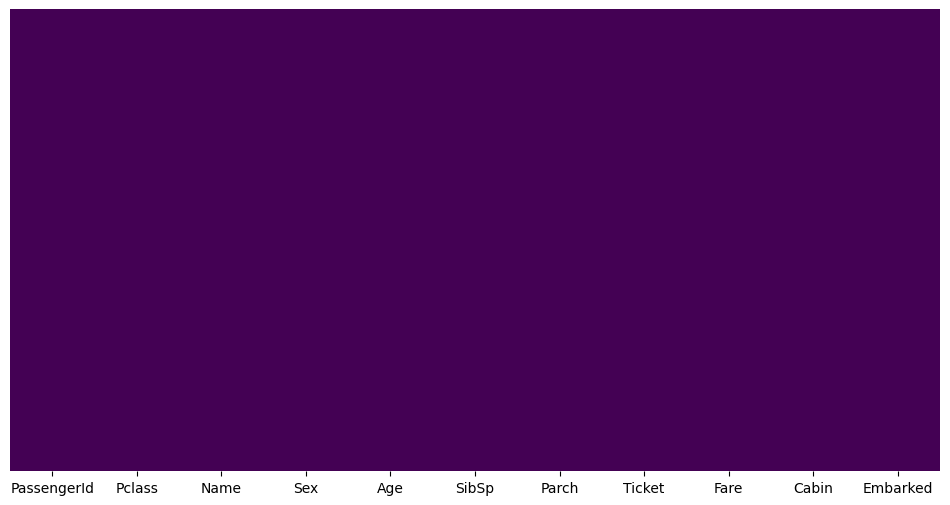

In [67]:
# Visualize missing data in graph

resizeplot()
sns.heatmap(survive_test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above two graphs we have deleted all the null values

In [68]:
survive_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
survive_test_data.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [70]:
# check whether there are duplicates in the train data
survive_data.duplicated().any()

False

In [71]:
survive_test_data.duplicated().any()

False

No Duplicate values are present


In [72]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
del survive_data["Name"]

In [74]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [75]:
# label encoder  to handle categorical data from the train dataset

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
survive_data['Sex']=l.fit_transform(survive_data[['Sex']])

In [76]:
# Converting the Attribute "Sex" from "Object" to "int"

survive_data['Sex'].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [77]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB


In [78]:
del survive_data["PassengerId"],survive_data["Ticket"] 

In [79]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [80]:
del survive_data["Cabin"],survive_data["Embarked"]

In [81]:
survive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [82]:
survive_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
del survive_test_data["Name"],survive_test_data["Ticket"],survive_test_data["Cabin"],survive_test_data["Embarked"]

In [84]:
survive_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [85]:
# label encoder  to handle categorical data from the train dataset

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
survive_test_data['Sex']=l.fit_transform(survive_test_data[['Sex']])

In [86]:
survive_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [87]:
del survive_test_data["PassengerId"]

In [88]:
survive_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int32  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 18.1 KB


# Data Preprocessing

In [89]:
# TRAIN DATA

# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data

survive_score_count=survive_data.Survived.value_counts()
print("class 0",survive_score_count[0])
print("class 1",survive_score_count[1])
print("proportion:",round(survive_score_count[0]/survive_score_count[1],2),": 1")
print("Total bank records :",len(survive_data))

class 0 549
class 1 342
proportion: 1.61 : 1
Total bank records : 891


In [90]:
# identifying independent and target variable

IndepVar=[]
for col in survive_data.columns:
    if col != 'Survived':
        IndepVar.append(col)
TarVar='Survived'
x=survive_data[IndepVar]
y=survive_data[TarVar]

In [91]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [92]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [93]:
#Describe the data

survive_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# Visualization

<AxesSubplot:xlabel='Sex'>

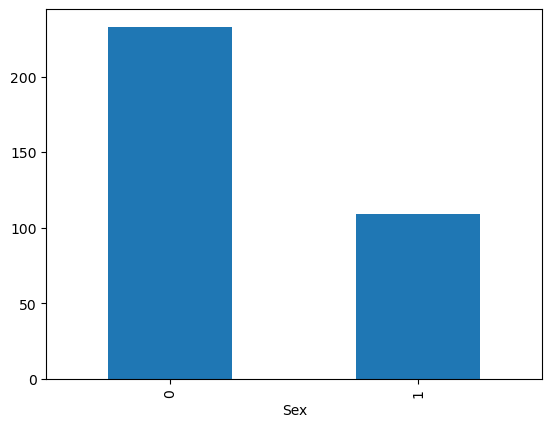

In [94]:
# Analysis based on Sex using Bar Chart

survive_data.groupby("Sex")["Survived"].sum().plot.bar()

<AxesSubplot:xlabel='Age'>

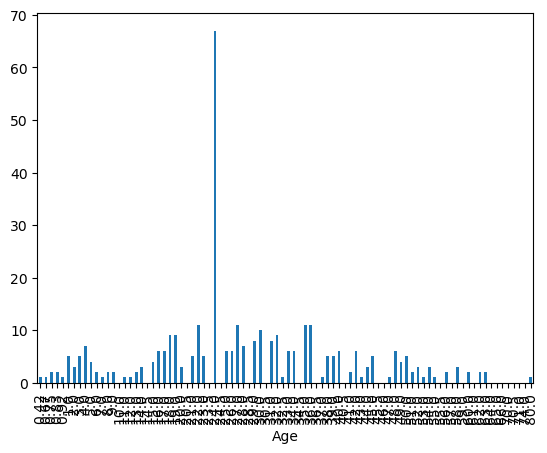

In [95]:
#Analysis based on Sex using Bar Chart

survive_data.groupby("Age")["Survived"].sum().plot.bar()

From the visualization young people and ladies are survived in higher rate.

<AxesSubplot:ylabel='Survived'>

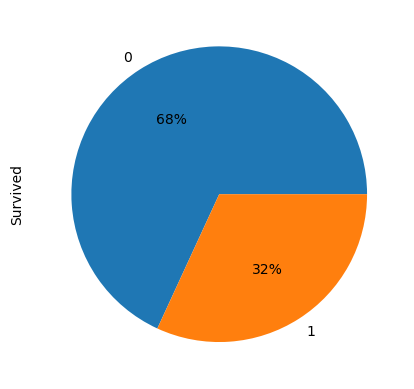

In [96]:
# Analysis based on Sex and Survived

survive_data.groupby("Sex")["Survived"].sum().plot.pie(autopct="%1.0f%%")

In [97]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 6), (268, 6), (623,), (268,))

In [98]:
# import the MinMaxScalar from sklearn

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

# fit_transform(). It will calculate the mean(μ)and standard deviation(σ) of the feature
#F at a time it will transform the data points of the feature F.
#x_train[cols2]=mmscaler.fit_transform(x_train[cols2])
x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

#x_test[cols2]=mmscaler.fit_transform(x_test[cols2])
x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [99]:
# load the result dataset
Result=pd.read_csv(r"C:\Users\sindu\OneDrive\Documents\summer-1\EMResults.csv",header=0)

# display first fve records

Result

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 67  33]
 [ 21 147]]
Outcome values : 
 67 33 21 147
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.67      0.71       100
           0       0.82      0.88      0.84       168

    accuracy                           0.80       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.80      0.80      0.80       268

Accuracy : 79.9 %
Precision : 76.1 %
Recall : 67.0 %
F1 Score : 0.713
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 77.2 %
MCC : 0.561
roc_auc_score: 0.772


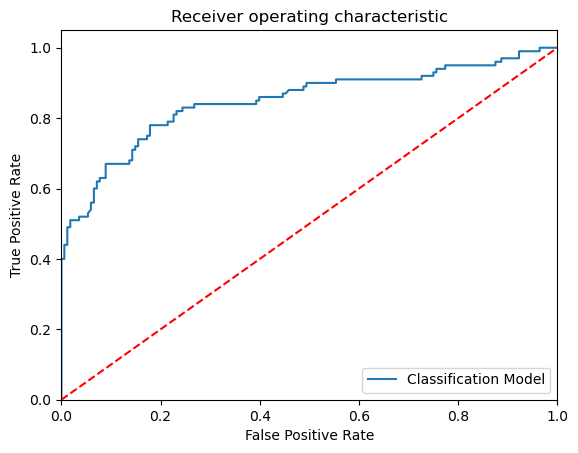

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 66  34]
 [ 37 131]]
Outcome values : 
 66 34 37 131
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.66      0.65       100
           0       0.79      0.78      0.79       168

    accuracy                           0.74       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.74      0.74      0.74       268

Accuracy : 73.5 %
Precision : 64.1 %
Recall : 66.0 %
F1 Score : 0.65
Specificity or True Negative Rate : 78.0 %
Balanced Accuracy : 72.0 %
MCC : 0.437
roc_auc_score: 0.72


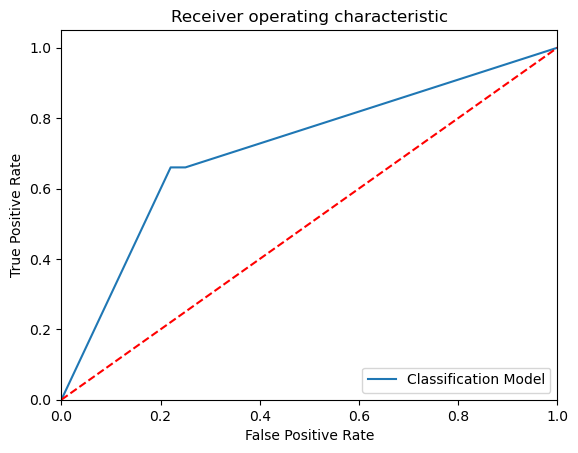

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 68  32]
 [ 24 144]]
Outcome values : 
 68 32 24 144
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.68      0.71       100
           0       0.82      0.86      0.84       168

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Accuracy : 79.1 %
Precision : 73.9 %
Recall : 68.0 %
F1 Score : 0.708
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 76.8 %
MCC : 0.547
roc_auc_score: 0.769


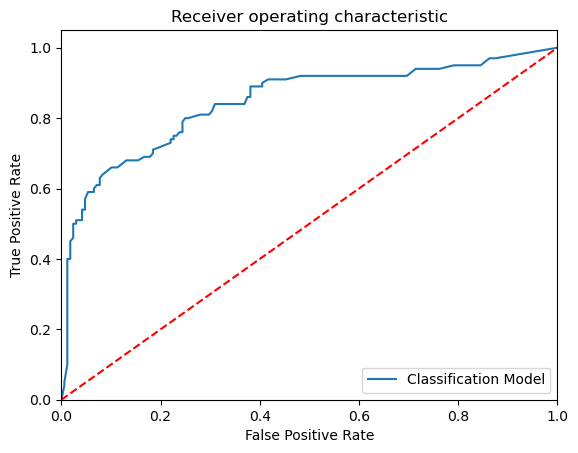

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 66  34]
 [ 24 144]]
Outcome values : 
 66 34 24 144
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.66      0.69       100
           0       0.81      0.86      0.83       168

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

Accuracy : 78.4 %
Precision : 73.3 %
Recall : 66.0 %
F1 Score : 0.695
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 75.8 %
MCC : 0.53
roc_auc_score: 0.759


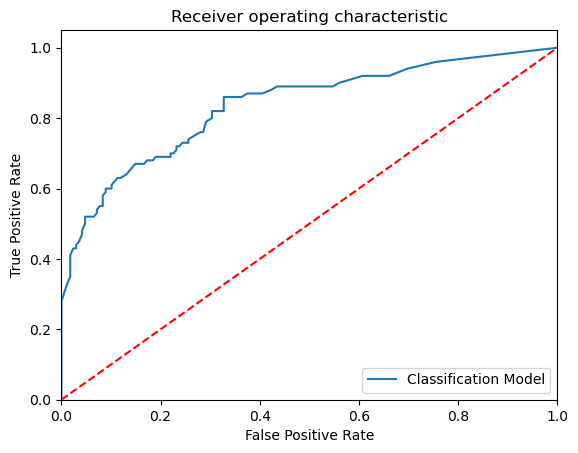

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 69  31]
 [ 47 121]]
Outcome values : 
 69 31 47 121
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.69      0.64       100
           0       0.80      0.72      0.76       168

    accuracy                           0.71       268
   macro avg       0.70      0.71      0.70       268
weighted avg       0.72      0.71      0.71       268

Accuracy : 70.9 %
Precision : 59.5 %
Recall : 69.0 %
F1 Score : 0.639
Specificity or True Negative Rate : 72.0 %
Balanced Accuracy : 70.5 %
MCC : 0.4
roc_auc_score: 0.705


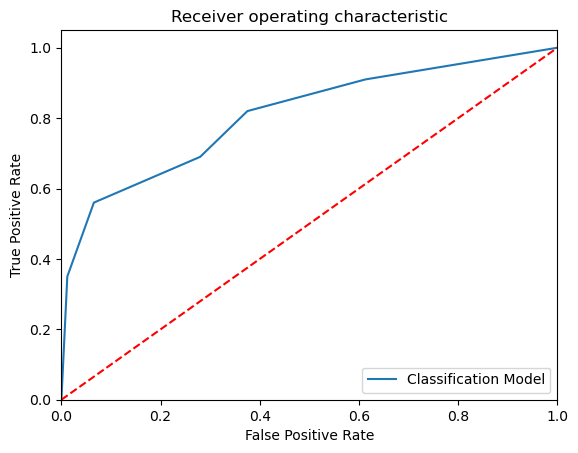

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 70  30]
 [ 23 145]]
Outcome values : 
 70 30 23 145
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.70      0.73       100
           0       0.83      0.86      0.85       168

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy : 80.2 %
Precision : 75.3 %
Recall : 70.0 %
F1 Score : 0.725
Specificity or True Negative Rate : 86.3 %
Balanced Accuracy : 78.2 %
MCC : 0.572
roc_auc_score: 0.782


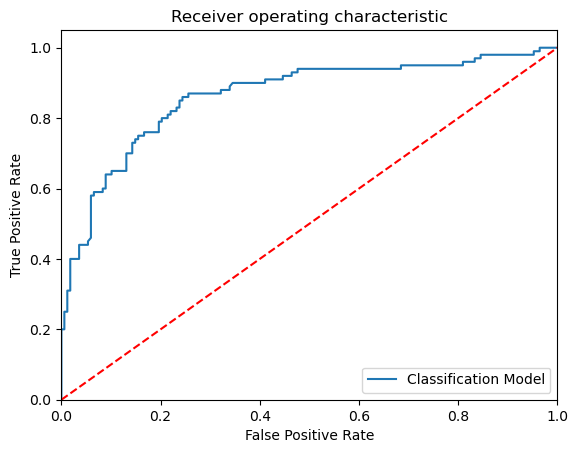

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 71  29]
 [ 25 143]]
Outcome values : 
 71 29 25 143
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.71      0.72       100
           0       0.83      0.85      0.84       168

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

Accuracy : 79.9 %
Precision : 74.0 %
Recall : 71.0 %
F1 Score : 0.724
Specificity or True Negative Rate : 85.1 %
Balanced Accuracy : 78.0 %
MCC : 0.566
roc_auc_score: 0.781


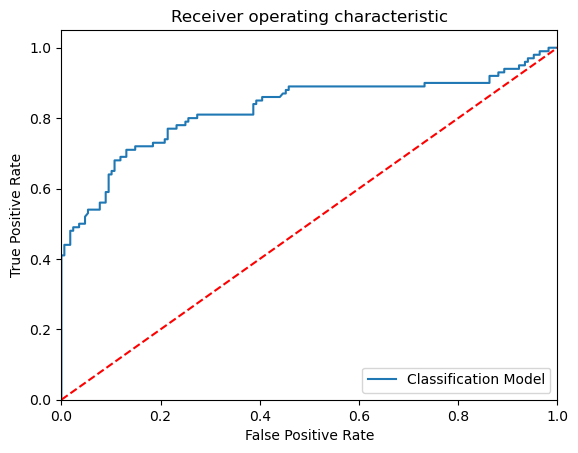

-----------------------------------------------------------------------------------------------------


In [100]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Result = Result.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [101]:
Result

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),67,33,21,147,0.799,0.761,0.67,0.713,0.875,0.561,0.772500,0.772
1,DecisionTreeClassifier(),66,34,37,131,0.735,0.641,0.66,0.650,0.780,0.437,0.719881,0.720
2,"(DecisionTreeClassifier(max_features='auto', r...",68,32,24,144,0.791,0.739,0.68,0.708,0.857,0.547,0.768571,0.768
3,"(ExtraTreeClassifier(random_state=2146430788),...",66,34,24,144,0.784,0.733,0.66,0.695,0.857,0.530,0.758571,0.758
4,KNeighborsClassifier(),69,31,47,121,0.709,0.595,0.69,0.639,0.720,0.400,0.705119,0.705
5,"SVC(class_weight='balanced', probability=True,...",70,30,23,145,0.802,0.753,0.70,0.725,0.863,0.572,0.781548,0.782
6,GaussianNB(),71,29,25,143,0.799,0.740,0.71,0.724,0.851,0.566,0.780595,0.780


# Logistic Regression model

In [102]:
survive_test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [108]:
# prediction the model with the test dataset

y_pred1=ModelLR.predict(survive_test_data)

y_pred1=pd.DataFrame(y_pred1)

In [109]:
# Results1 = pd.DataFrame({'Cresit_Score_A':y_test, 'Credit_Score_P':y_pred1})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = survive_test_data.merge(y_pred1, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,0
28,1,1,41.0,0,0,30.50,0
227,3,0,21.0,0,0,7.75,0
257,3,1,28.0,0,0,8.05,0
162,2,0,26.0,0,0,13.50,0
50,1,1,24.0,1,0,60.00,0


In [110]:
ResultsFinal.rename(columns = {0:'Survived'}, inplace = True)

In [111]:
ResultsFinal

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,21.0,0,0,8.0500,0
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,0
416,3,1,21.0,0,0,8.0500,0


In [112]:
ResultsFinal['Survived'].value_counts()

0    386
1     32
Name: Survived, dtype: int64